In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

In [25]:
df = pd.read_csv('/content/Modellemeson.csv')
df

,Tarih,DolulukOrani_Yuzde,SuDurumu_m3,Nufus,Sicaklik_Ort,Yagis_mm,Su_Tuketim_Aylik_m3,URETIM_MIKTARI,Turist_Sayisi
0,2015-01-01,35.86,346107000.0,4279677,10.6,105.6,16575000.0,16891310,42500
1,2015-02-01,56.50,428866000.0,4279677,12.5,107.1,17160000.0,15197664,51000
2,2015-03-01,70.91,506826000.0,4279677,14.6,154.1,18525000.0,17023016,68000
3,2015-04-01,76.15,509252000.0,4279677,20.4,60.0,20475000.0,16851812,85000
4,2015-05-01,74.88,505465000.0,4279677,23.7,24.5,22425000.0,19003837,102000
...,...,...,...,...,...,...,...,...,...
115,2024-08-01,34.97,264992000.0,4535123,31.2,6.8,31658676.0,23511160,280000
116,2024-09-01,27.30,237262000.0,4535123,24.9,24.5,29223393.0,21767425,210000
117,2024-10-01,21.79,218598000.0,4535123,22.3,47.6,26788111.0,21506608,140000
118,2024-11-01,18.94,200069000.0,4535123,15.3,73.0,23135187.0,19407677,105000


In [26]:
df.drop('Tarih',axis=1,inplace=True)

In [27]:
df.isnull().sum()

,0
DolulukOrani_Yuzde,0
SuDurumu_m3,0
Nufus,0
Sicaklik_Ort,0
Yagis_mm,0
Su_Tuketim_Aylik_m3,0
URETIM_MIKTARI,0
Turist_Sayisi,0


In [28]:
X = df.drop(columns=['DolulukOrani_Yuzde'])
y = df.iloc[:,0]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

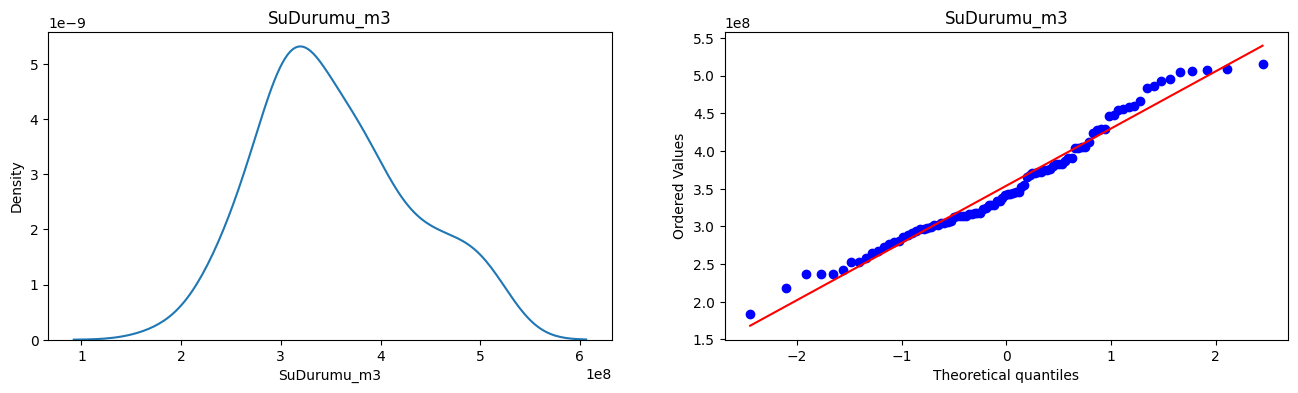

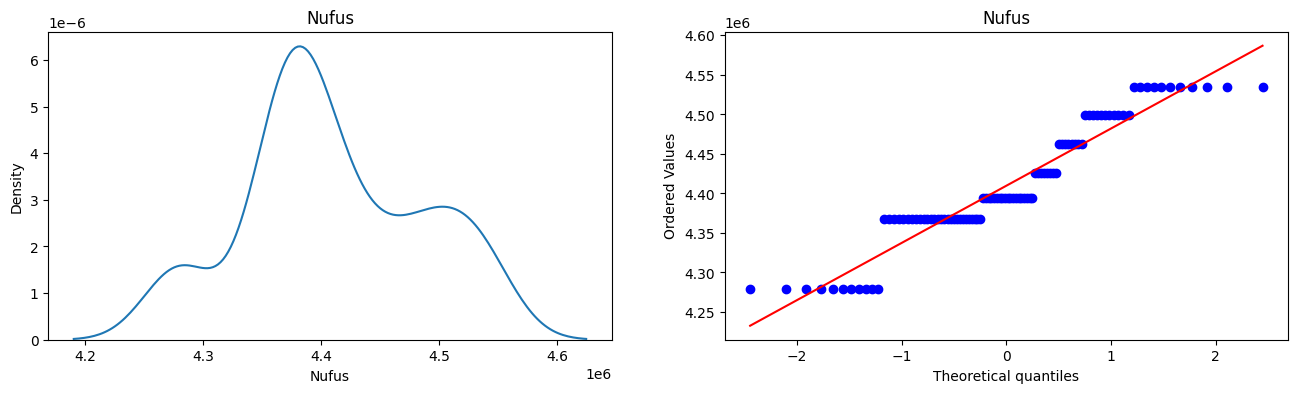

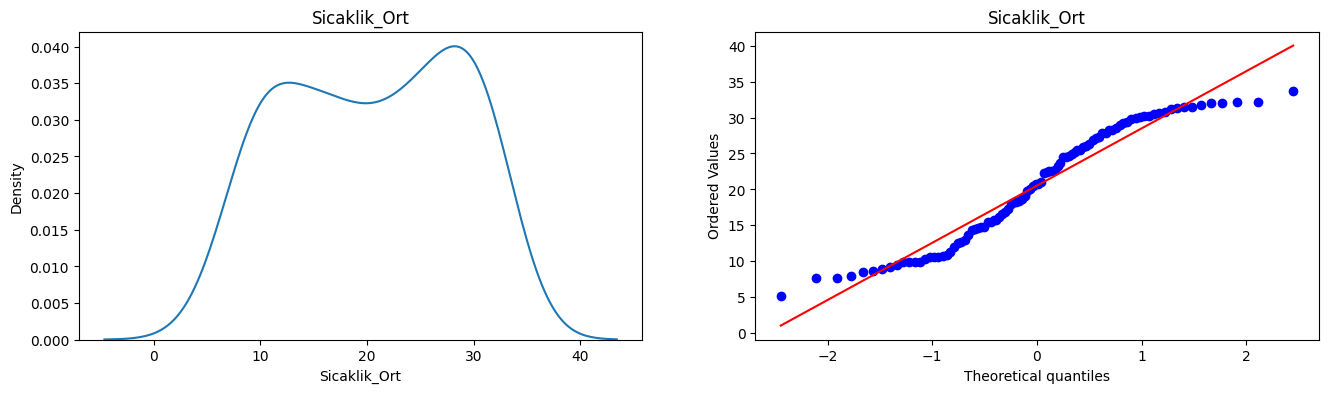

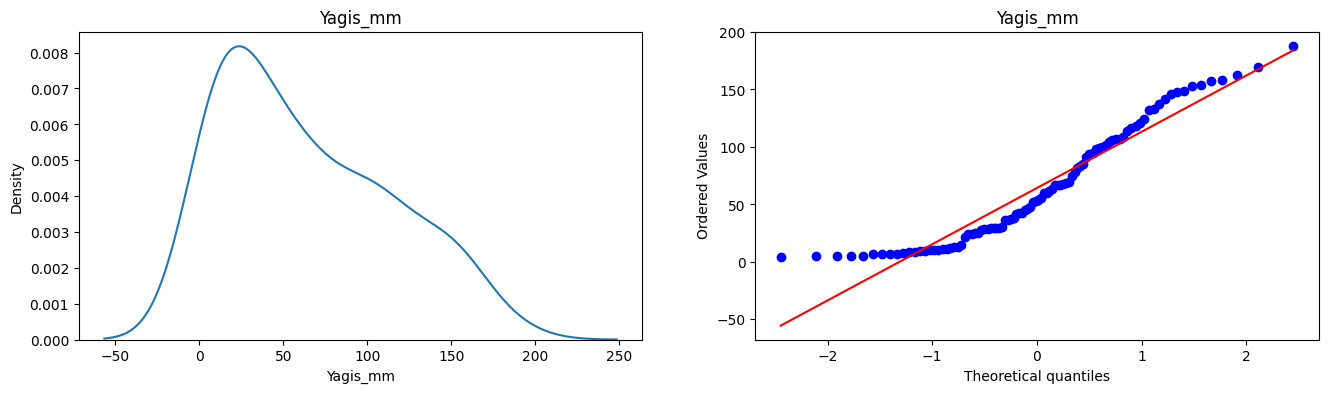

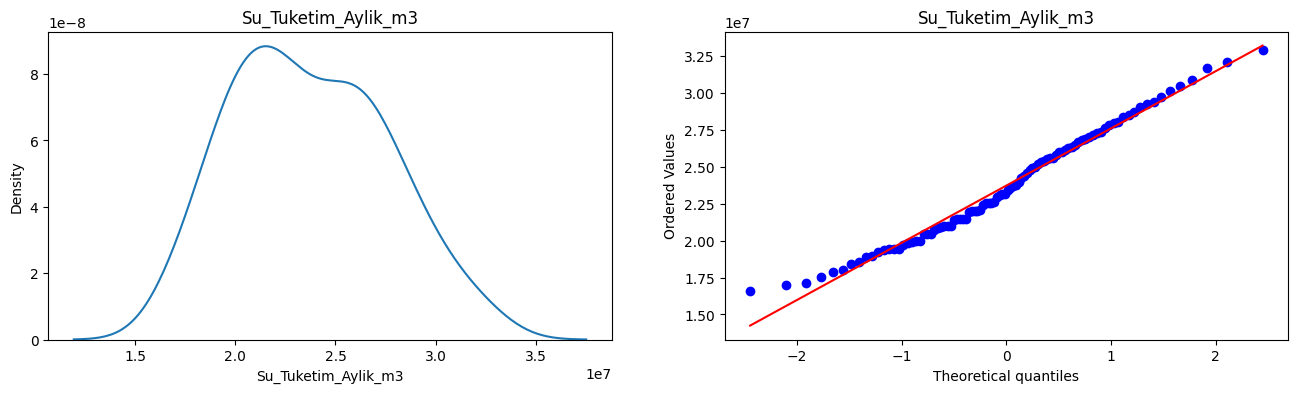

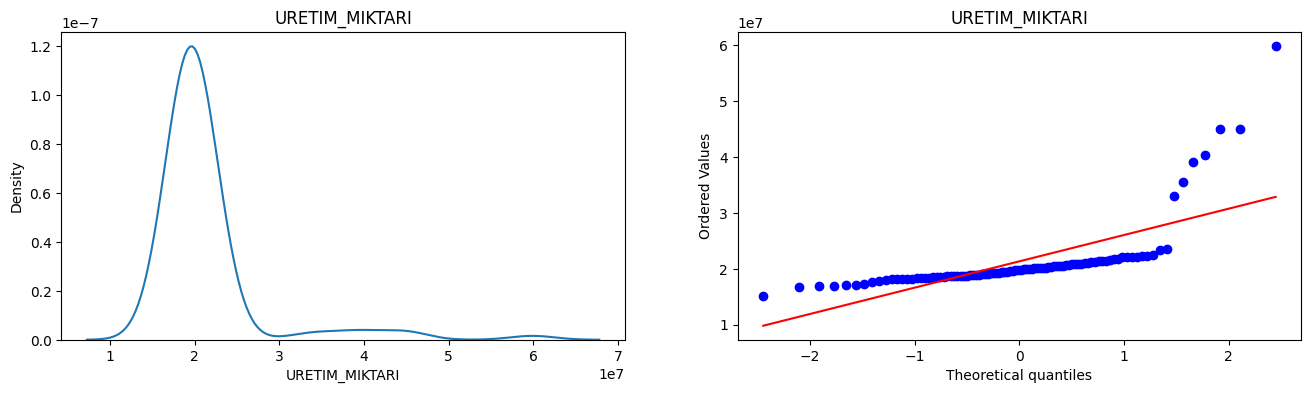

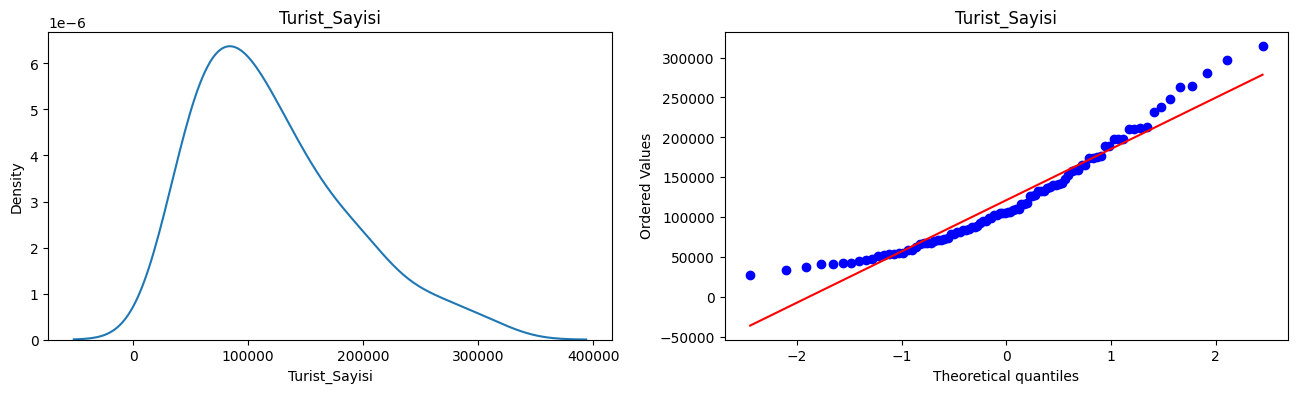

In [30]:
# Plotting kde and QQ plot
for col in X_train.columns:
  figure = plt.figure(figsize=(16,4))
  plt.subplot(121)
  sns.kdeplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.title(col)

  plt.show()

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred1 = lr.predict(X_test)

In [33]:
r2_score(y_test,y_pred1)

0.8712669081347387

In [34]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.7174606383667735)

# Power Transformation

In [35]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

In [36]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred2 = lr.predict(X_test_transformed)

In [37]:
r2_score(y_test,y_pred2)

0.9119906476881393

In [38]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.7469006626626659)

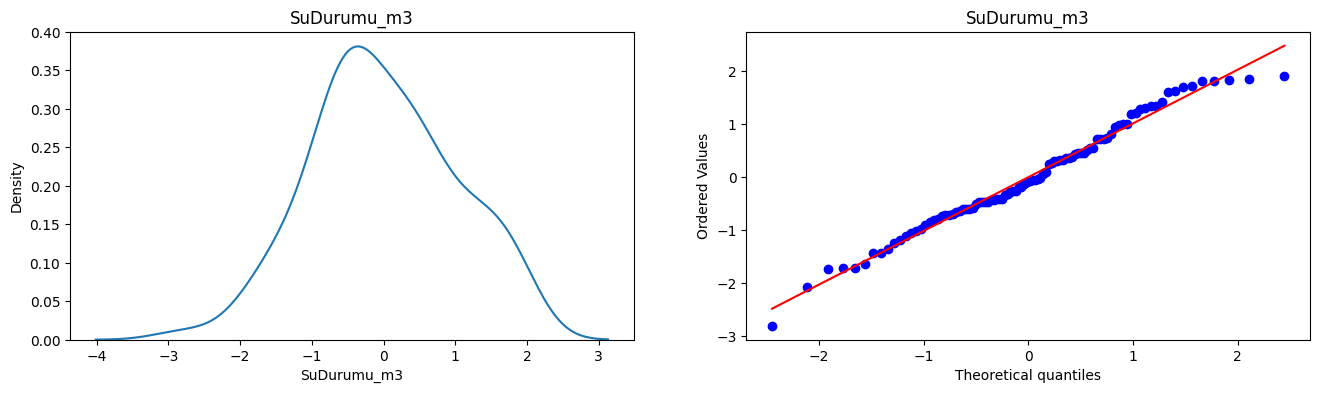

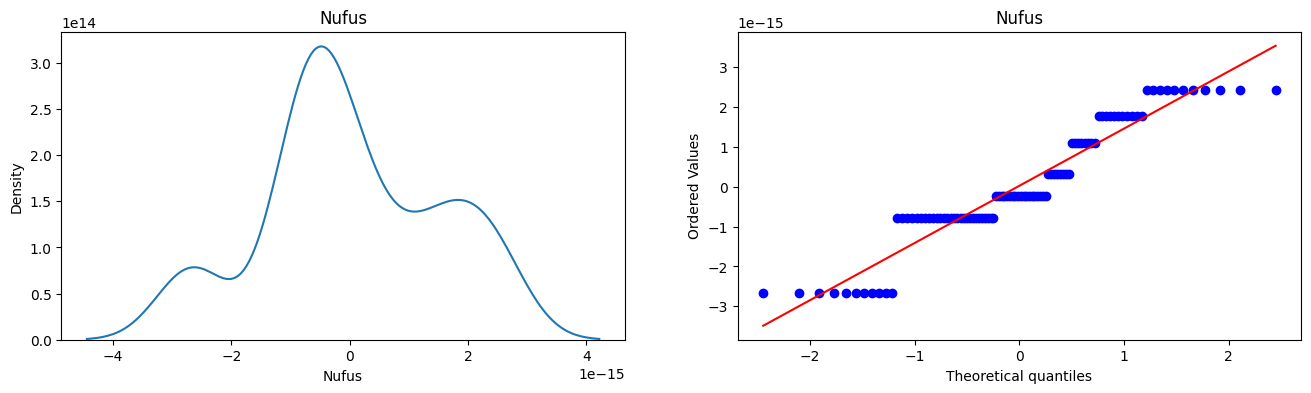

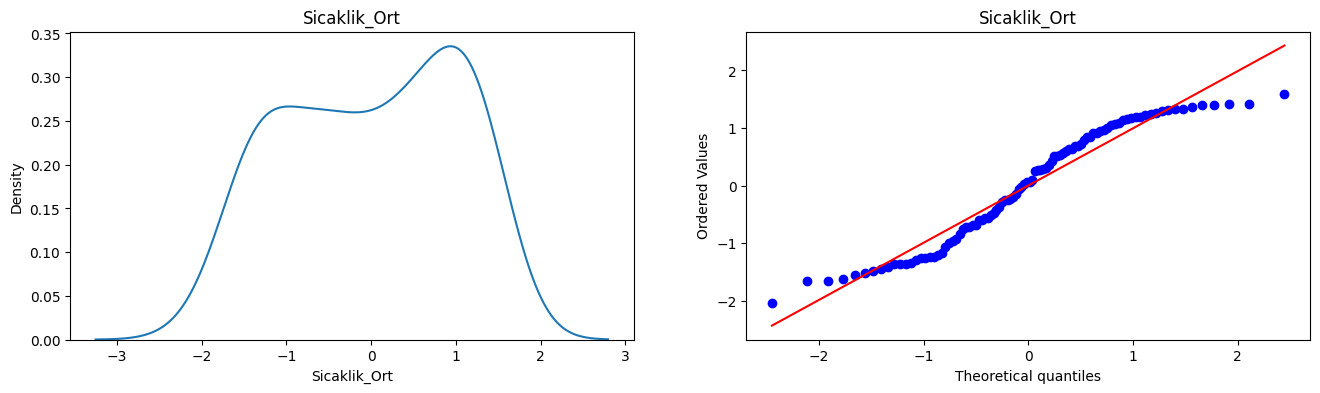

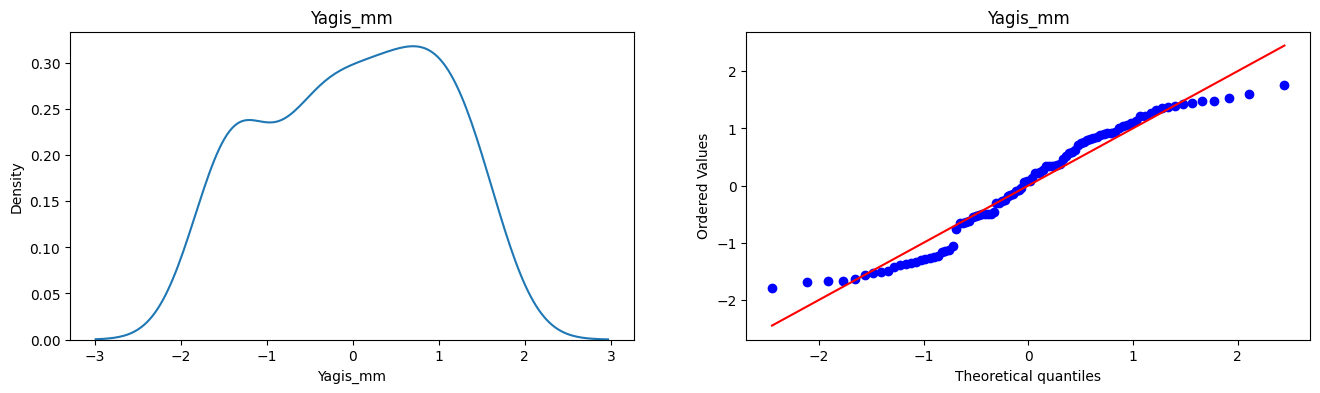

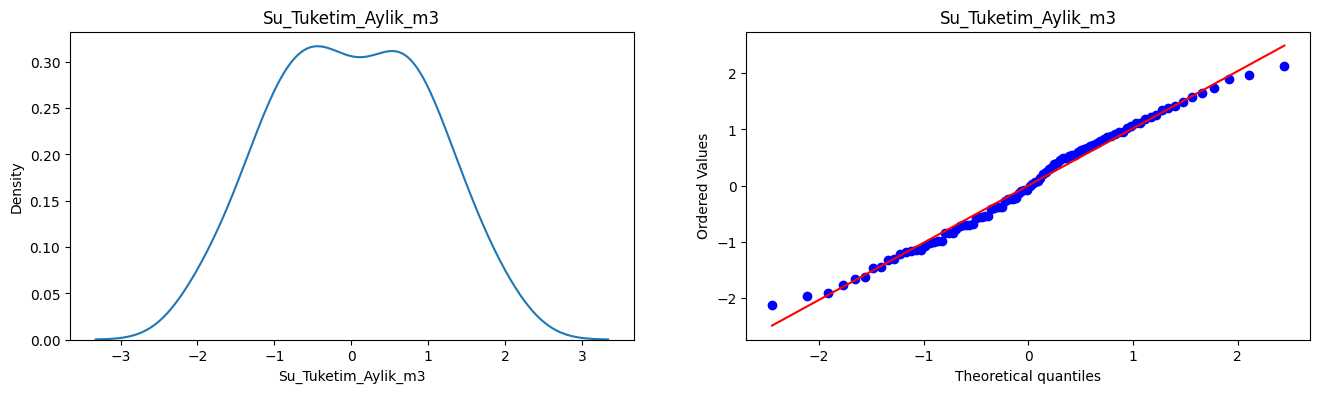

/tmp/ipython-input-1023041232.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_transformed[col])


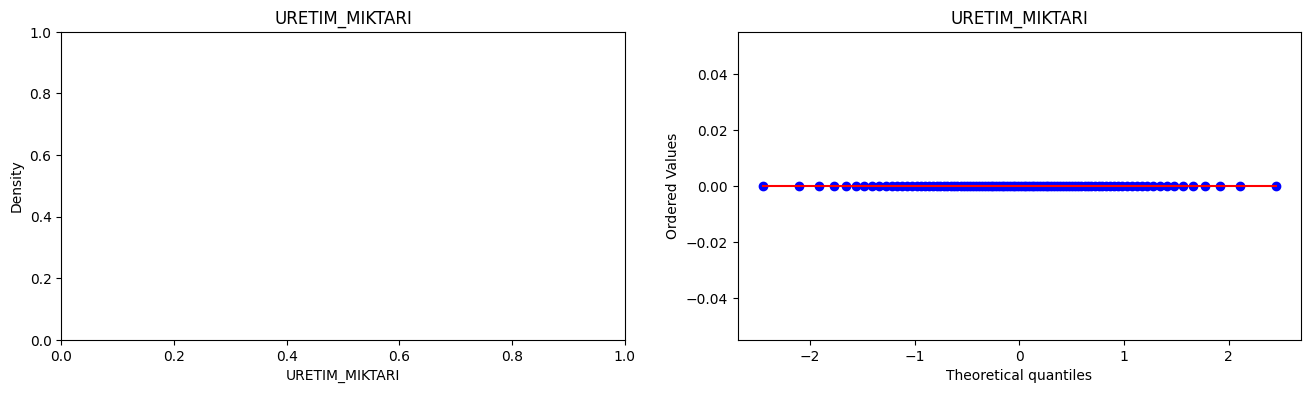

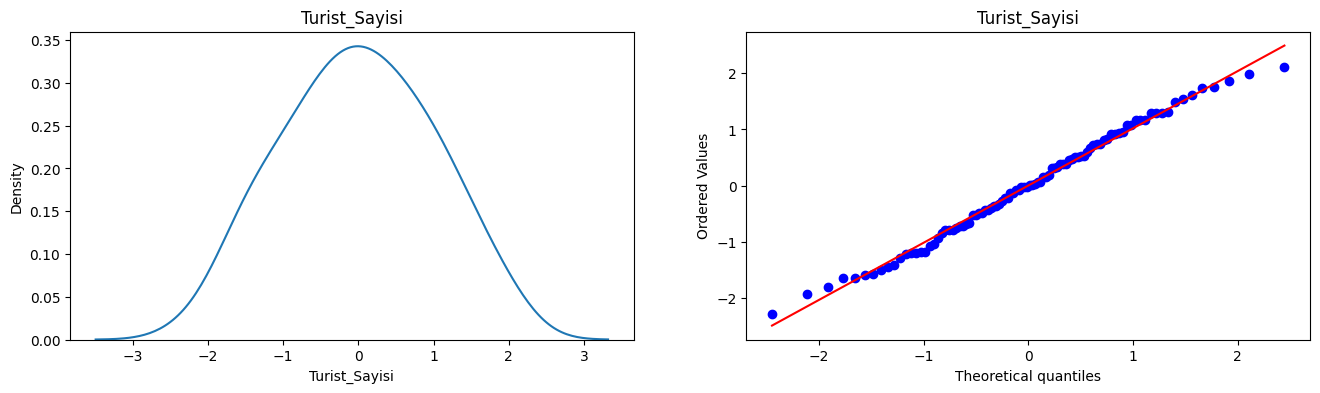

In [39]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train.columns:
  figure = plt.figure(figsize=(16,4))
  plt.subplot(121)
  sns.kdeplot(X_train_transformed[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
  plt.title(col)

  plt.show()

In [40]:
pt2 = PowerTransformer()
X_train_transformed2 = pt2.fit_transform(X_train)
X_test_transformed2 = pt2.transform(X_test)

In [41]:
lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3 = lr.predict(X_test_transformed2)

In [42]:
r2_score(y_test,y_pred3)

0.9047417583792465

In [43]:
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.7469997453282075)

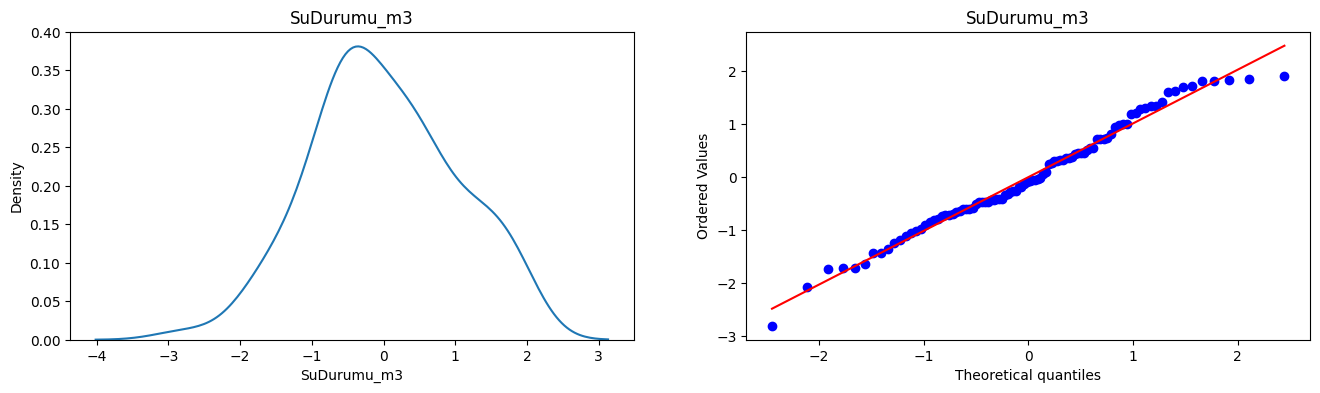

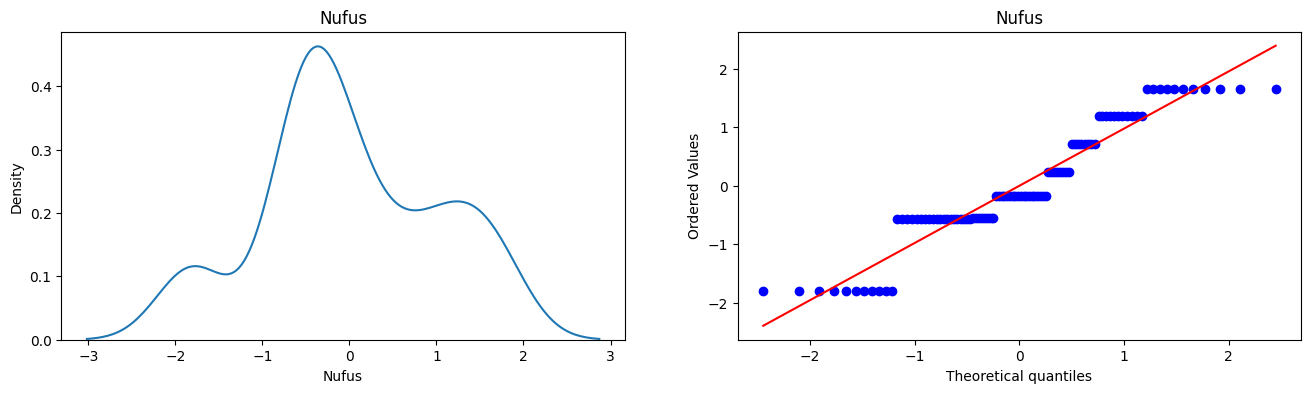

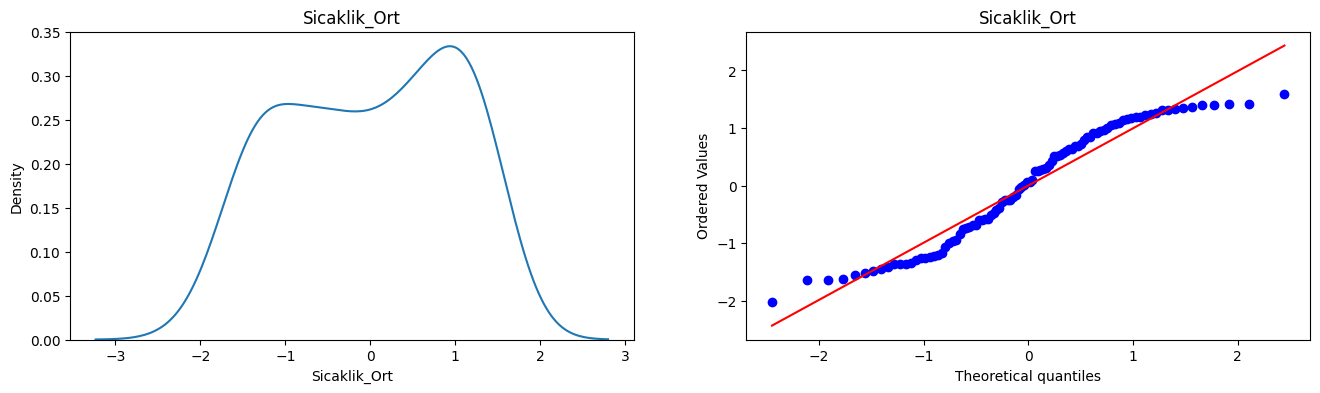

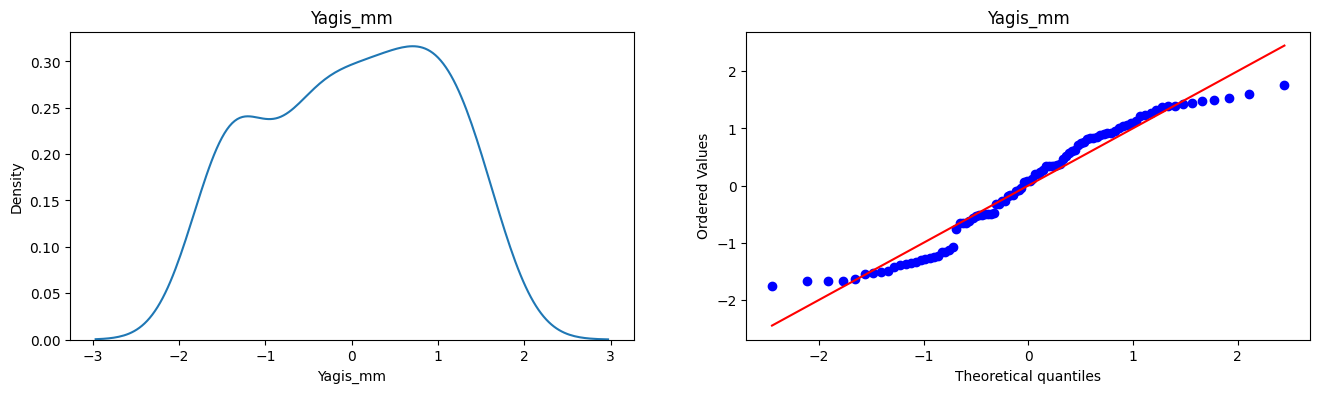

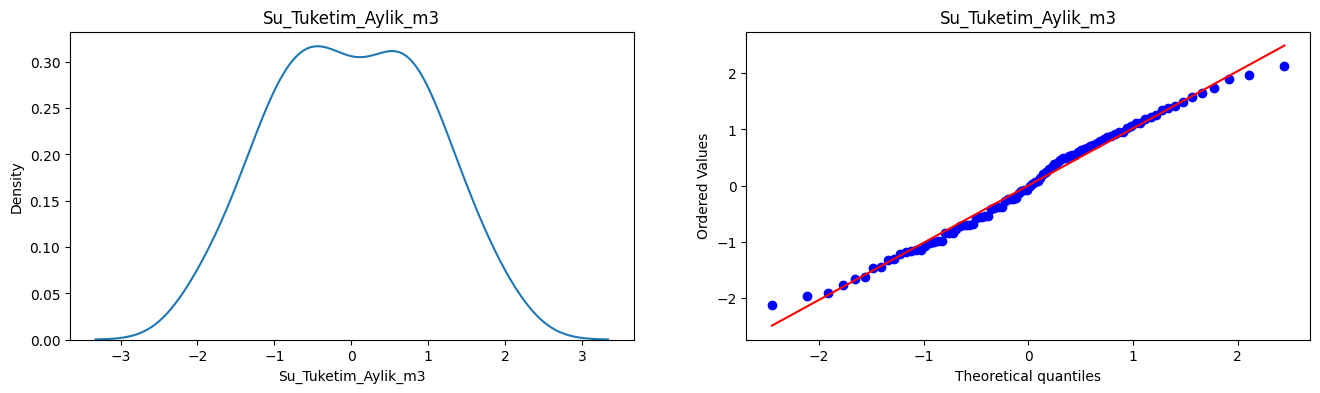

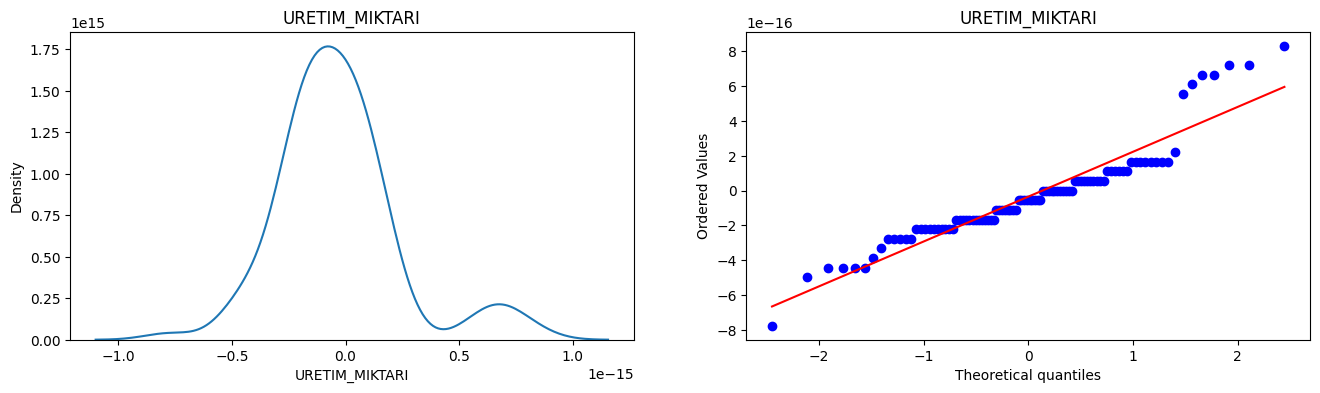

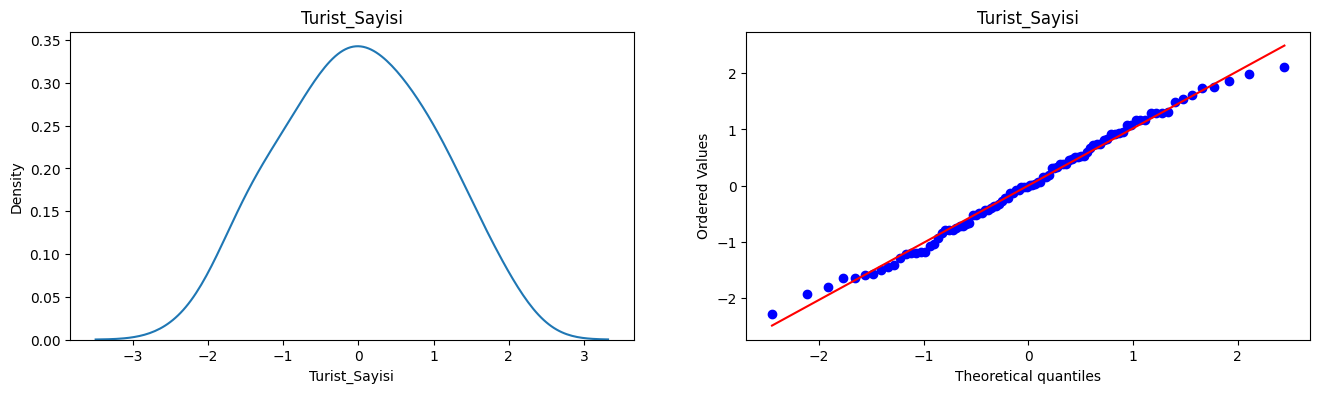

In [44]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)
for col in X_train.columns:
  figure = plt.figure(figsize=(16,4))
  plt.subplot(121)
  sns.kdeplot(X_train_transformed2[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train_transformed2[col],dist='norm',plot=plt)
  plt.title(col)

  plt.show()